# Dataset Analysis

In [1]:
import datasets, re
import pandas as pd
from sklearn import preprocessing as sk_preprocess

In [2]:
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.describe()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-1d47093687320b66
Reusing dataset parquet (C:\Users\ksmunoz\.cache\huggingface\datasets\ucberkeley-dlab___parquet\ucberkeley-dlab--measuring-hate-speech-1d47093687320b66\0.0.0\7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,...,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000
mean,23528.597283,5566.552523,1.281199,2.954280,2.828751,2.563152,2.278333,2.698784,1.845651,1.051666,...,0.744527,-0.567465,1.034367,1.001085,-0.018735,0.300572,1.007152,1.011709,0.014535,37.912799
std,12386.724630,3230.864231,1.023495,1.231662,1.309693,1.389984,1.370983,0.898430,1.402575,1.345656,...,0.932267,2.380312,0.496865,0.791993,0.487189,0.236407,0.269875,0.676072,0.613035,11.643449
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18147.750000,2720.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341100,29.000000
50%,20052.000000,5600.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32035.000000,8363.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [3]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df.shape

(135388, 131)

In [5]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

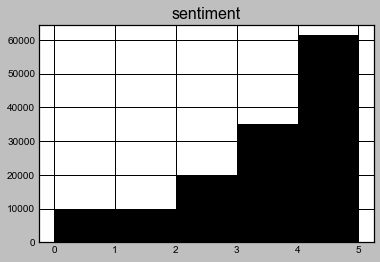

In [37]:
from matplotlib import pyplot as plt
plt.style.use('grayscale')
print(plt.style.available)
df.hist(column='sentiment', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'respect'}>]], dtype=object)

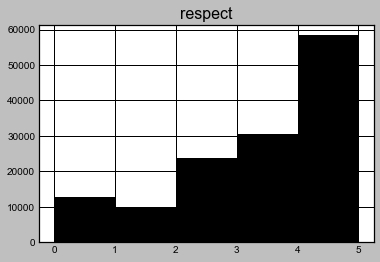

In [38]:
df.hist(column='respect', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'insult'}>]], dtype=object)

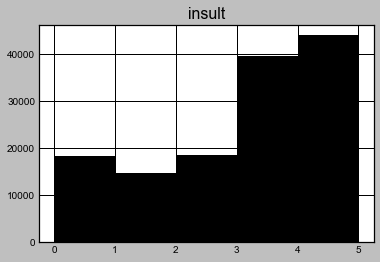

In [39]:
df.hist(column='insult', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'humiliate'}>]], dtype=object)

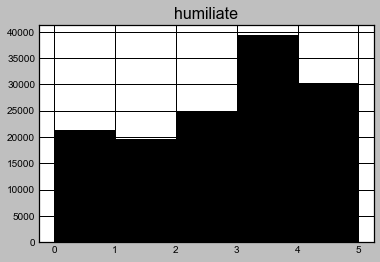

In [40]:
df.hist(column='humiliate', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'status'}>]], dtype=object)

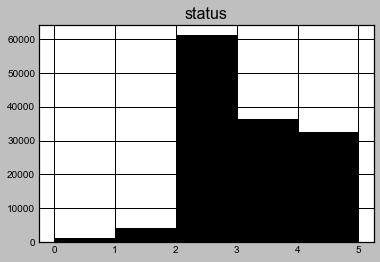

In [41]:
df.hist(column='status', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'dehumanize'}>]], dtype=object)

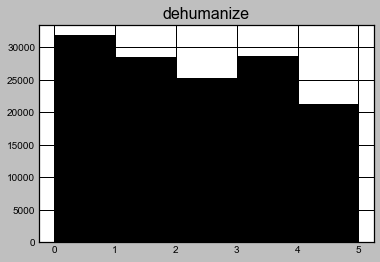

In [42]:
df.hist(column='dehumanize', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'violence'}>]], dtype=object)

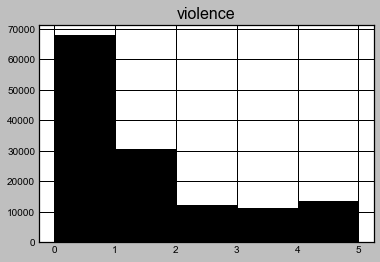

In [43]:
df.hist(column='violence', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'genocide'}>]], dtype=object)

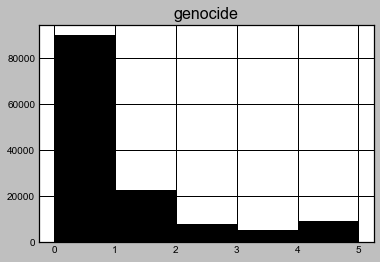

In [44]:
df.hist(column='genocide', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'attack_defend'}>]], dtype=object)

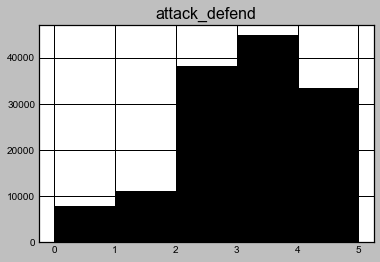

In [49]:
df.hist(column='attack_defend', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'platform'}>]], dtype=object)

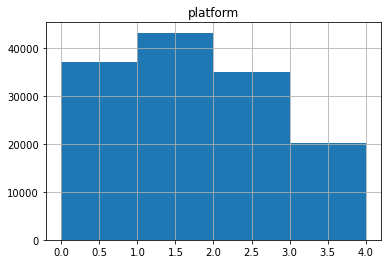

In [15]:
df.hist(column='platform', bins=[0,1,2,3,4])

<AxesSubplot:>

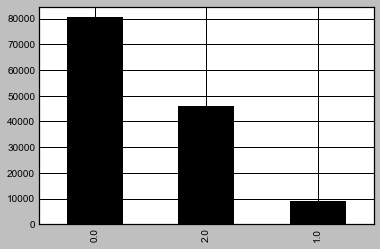

In [48]:
df['hatespeech'].value_counts().plot(kind='bar')

In [17]:
sample = df.loc[df['hatespeech'].isin([0,1,2]), ['text','hatespeech', 'hate_speech_score']].sample(5)
for text in sample.values:
    print(text)

['You sound like the type of person who thinks calling most Mexicans "rapists murderers and thieves" isn\'t racist.'
 0.0 -1.72]
["@Cam_Coles You don't know what I know. Name somebody colder, you monkey faced immigrant"
 0.0 1.48]
["I'm waiting mother fucker, because I LOVE crushing Cowboy fags" 2.0 3.32]
['@matthewbr007 @mPinoe Just looking at her you can tell everything about her personality... total loser'
 0.0 -0.02]
['This just proves that Africans are morons' 0.0 0.51]


In [18]:
print('hatespeech max:', df.hatespeech.max())
print('hatespeech min:', df.hatespeech.min())
print('hate_speech_score max:', df.hate_speech_score.max())
print('hate_speech_score min:', df.hate_speech_score.min())

hatespeech max: 2.0
hatespeech min: 0.0
hate_speech_score max: 6.3
hate_speech_score min: -8.34


### Normalize Data

In [19]:
def split_hashtag(token: str) -> str:
    i, end = len(token) - 2, len(token) + 1
    response = ''
    while i >= 1:
        word = token[i:end]
        if word[0].isupper():
            response = token[i:end] + ' ' + response
            end = i
        i -= 1
    else:
        if end-1 > 0:
            response = token[1:end] + ' ' + response
    return(response.strip())

In [20]:
def expand_contractions(document: str) -> str:
    """
    Replace all abbreviations with their corresponding expansion
    """
    document = re.sub(r"'cause", "because", document)
    document = re.sub(r"o'clock", "of the clock", document)
    document = re.sub(r"won\'t", "will not", document)
    document = re.sub(r"can\'t", "can not", document)
    document = re.sub(r"n\'t", " not", document)
    document = re.sub(r"\'re", " are", document)
    document = re.sub(r"\'s", " is", document)
    document = re.sub(r"\'d", " would", document)
    document = re.sub(r"\'ll", " will", document)
    document = re.sub(r"\'t", " not", document)
    document = re.sub(r"\'ve", " have", document)
    document = re.sub(r"\'m", " am", document)
    return document

In [21]:
def preprocessing(document: str) -> list:
    """
    expand contractions
    replace any @user type with 'user' token
    split hashtags into words by upper case
    text to lower case
    remove new line char
    remove non latin chars
    remove extra blank spaces
    """
    document = expand_contractions(document)
    document = re.sub('@[a-zA-Z0-9_-]{0,150}', 'user', document)
    hashtags = re.findall('#[a-zA-Z0-9_-]{0,150}', document)
    for hashtag in hashtags:
        split = split_hashtag(hashtag)
        document = re.sub(hashtag, split, document)
    document = document.lower()
    document = re.sub('\n', ' ', document)
    document = re.sub('[^a-zA-Z]|[0-9]', ' ', document)
    document = re.sub('\s+', ' ', document)
    return document

In [22]:
columns = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score']
data = df[columns]
min_max_scaler = sk_preprocess.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data.values)
dataset = pd.DataFrame(data_scaled, columns=columns)
dataset['text'] = df.text
dataset['processed'] = df.text.apply(preprocessing)

In [31]:
dataset.sample(2)

,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech,hate_speech_score,text,processed
21966,1.0,0.75,0.75,0.75,0.75,0.25,0.00,0.0,1.0,0.0,0.607240,"@jemelehill @chick_in_kiev The ""mental health""...",user user the mental health malarkey is nsra k...
39411,1.0,1.00,1.00,0.75,0.75,0.00,0.25,0.0,1.0,1.0,0.622268,FUCK CHRISTIANS TRUMP 2020,fuck christians trump


In [24]:
dataset.sample(10)[['text', 'processed']]

,text,processed
64547,Something autistic,something autistic
7393,@amnesty @TripAdvisor Israel just issued 700 n...,user user israel just issued new permits for a...
70240,"'Not gonna lie sir, probably not much you're g...",not gonna lie sir probably not much you are g...
76089,Fuck all you faggots then. I still got in the ...,fuck all you faggots then i still got in the b...
44312,"mhmmmm, show me how you fuck that ass slutty",mhmmmm show me how you fuck that ass slutty
80693,"I'd hold your waist tight,spank you ass pink a...",i would hold your waist tight spank you ass pi...
96498,Every gook in #LosAngeles should be deported o...,every gook in los angeles should be deported o...
80099,"At your big ages, you niggas still tweeting bo...",at your big ages you niggas still tweeting bou...
135276,I've always been proud of the Igbo tribe and o...,i have always been proud of the igbo tribe and...
124261,Why did I click on your profile? You gave no s...,why did i click on your profile you gave no so...


In [29]:
a = dataset.sample(10)[['text', 'processed']]
a.to_excel('dataset.xlsx')

array([[<AxesSubplot:title={'center':'hate_speech_score'}>]], dtype=object)

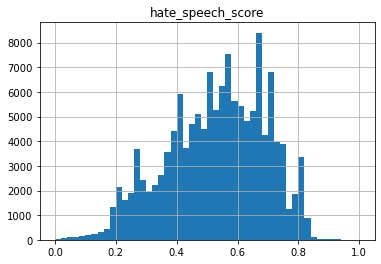

In [25]:
dataset.hist(column='hate_speech_score', bins=50)

array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

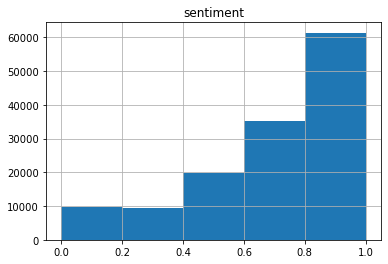

In [26]:
dataset.hist(column='sentiment', bins=5)

In [27]:
from sklearn.model_selection import train_test_split

y_sample = dataset['hate_speech_score']
X_sample = dataset[columns]
X_sample = X_sample.drop(['hate_speech_score'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [28]:
x_test

,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech
118476,1.00,1.00,1.00,1.00,0.75,0.50,0.00,0.00,1.00,1.0
36627,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.25,0.0
15866,1.00,1.00,0.75,1.00,0.50,0.75,0.25,0.00,0.75,1.0
58223,0.75,0.75,0.50,0.50,0.50,0.25,0.25,0.25,0.50,0.0
37296,1.00,1.00,0.75,0.50,0.75,0.50,0.25,0.25,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...
131707,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.0
74924,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.50,0.0
38264,0.25,0.50,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.0
33066,1.00,1.00,0.75,0.75,1.00,0.00,0.00,0.00,0.75,1.0
